# Dataset Loading

In [ ]:
import pandas as pd
import zipfile
import os

#extracting zipfile
zip_path="/content/archive (1).zip"
extract_path="/content/ex_files"

with zipfile.ZipFile(zip_path,"r") as zip_ref:
  zip_ref.extractall(extract_path)

#listing the directory
os.listdir(extract_path)

['modified-dataset']

# Counting Images for each class

In [ ]:
import os
from collections import defaultdict

extracted_images_path = "/content/ex_files/modified-dataset"
class_image_counts = defaultdict(int)

# Walk through the extracted directory
for root, dirs, files in os.walk(extracted_images_path):
    # Get the directory name, which corresponds to the class label
    label = os.path.basename(root)

    # Count only image files in the current directory
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_image_counts[label] += 1

# Print the counts for each directory (class)
print("Image counts per directory in the extracted folder:")
for label, count in class_image_counts.items():
    if label: # Exclude the root directory count if it's 0
        print(f"Directory '{label}': {count} images")

Image counts per directory in the extracted folder:
Directory 'Washing Machine': 300 images
Directory 'Microwave': 300 images
Directory 'Mouse': 300 images
Directory 'Mobile': 300 images
Directory 'Printer': 300 images
Directory 'Player': 300 images
Directory 'PCB': 300 images
Directory 'Keyboard': 300 images
Directory 'Battery': 300 images
Directory 'Television': 300 images


# Splitting Dataset as Train, Test and Validation

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define the path to the extracted images
extracted_images_path = "/content/ex_files/modified-dataset"

# Get a list of all image files and their corresponding labels
image_paths = []
labels = []
for root, dirs, files in os.walk(extracted_images_path):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Split the data into training, validation, and testing sets
# First split into training and temp (for validation and testing)
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.3, random_state=42, stratify=labels
)

# Then split the temp set into validation and testing
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

print(f"Number of training images: {len(train_paths)}")
print(f"Number of validation images: {len(val_paths)}")
print(f"Number of testing images: {len(test_paths)}")

Number of training images: 2100
Number of validation images: 450
Number of testing images: 450


# Counting Images in Train, Test and Validation classes

In [ ]:
from collections import defaultdict

# Count class distribution for each split
train_class_counts = defaultdict(int)
val_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

# Use a loop to count class distribution for each split
datasets = [
    (train_labels, train_class_counts, "Training"),
    (val_labels, val_class_counts, "Validation"),
    (test_labels, test_class_counts, "Testing"),
]

for labels, counts_dict, name in datasets:
    for label in labels:
        counts_dict[label] += 1
    print(f"{name} set class distribution:", dict(counts_dict))

Training set class distribution: {'Battery': 210, 'Mobile': 210, 'Microwave': 210, 'Mouse': 210, 'PCB': 210, 'Television': 210, 'Printer': 210, 'Player': 210, 'Washing Machine': 210, 'Keyboard': 210}
Validation set class distribution: {'Printer': 45, 'Battery': 45, 'Television': 45, 'Washing Machine': 45, 'Player': 45, 'Keyboard': 45, 'Microwave': 45, 'Mobile': 45, 'Mouse': 45, 'PCB': 45}
Testing set class distribution: {'Television': 45, 'Microwave': 45, 'PCB': 45, 'Printer': 45, 'Battery': 45, 'Mouse': 45, 'Washing Machine': 45, 'Keyboard': 45, 'Mobile': 45, 'Player': 45}


#Plotting Train data

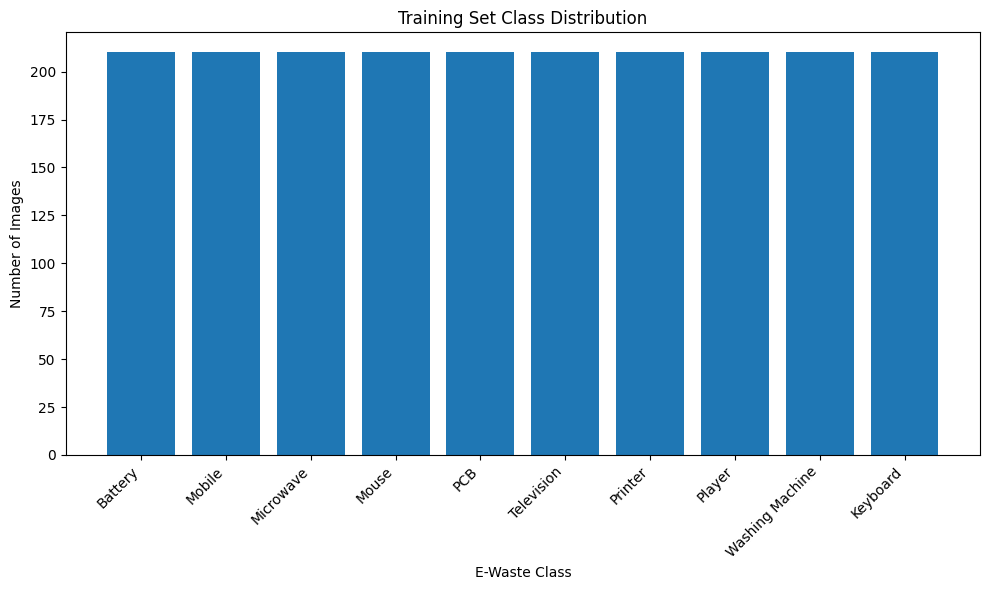

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_class_counts is available from the previous cell
# If not, please run the previous cell first to get the counts.

labels = list(train_class_counts.keys())
counts = list(train_class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel("E-Waste Class")
plt.ylabel("Number of Images")
plt.title("Training Set Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Plotting Validation data

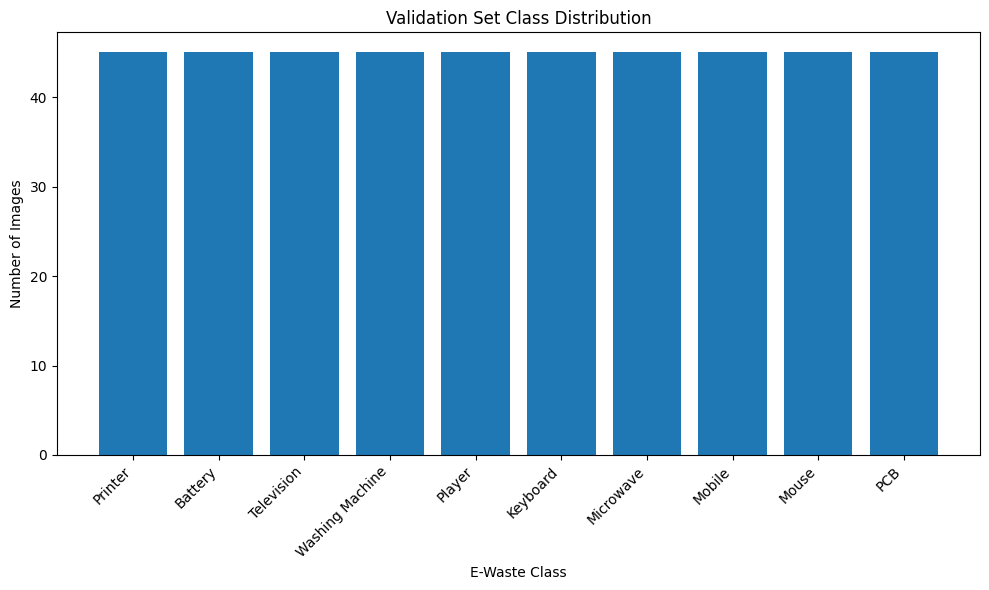

In [ ]:
labels = list(val_class_counts.keys())
counts = list(val_class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel("E-Waste Class")
plt.ylabel("Number of Images")
plt.title("Validation Set Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Plotting Test data

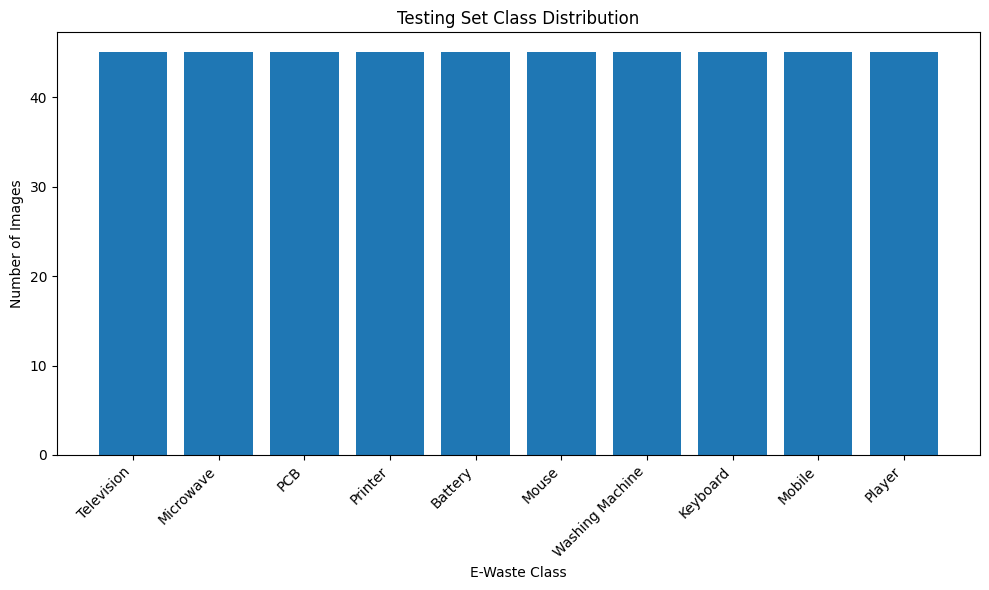

In [ ]:
labels = list(test_class_counts.keys())
counts = list(test_class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel("E-Waste Class")
plt.ylabel("Number of Images")
plt.title("Testing Set Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Loading Necessary Libraries

In [ ]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet
import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

#Sample Train Data

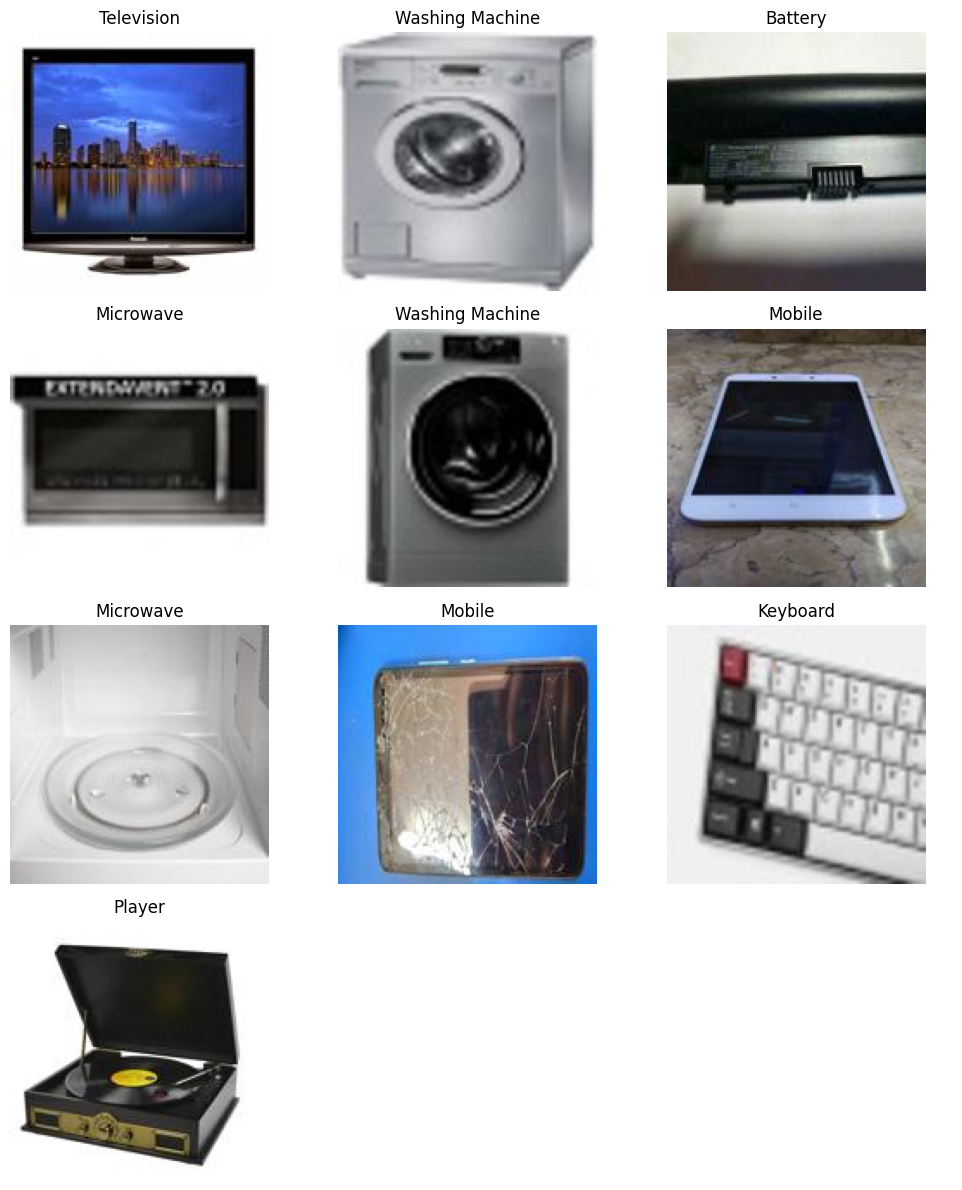

In [ ]:
import random
# Assuming train_paths and train_labels are available from the data splitting step
# Assuming images have been copied to the train_dir

# Define the number of sample images to display
num_samples = 10

# Select random indices from the training data
sample_indices = random.sample(range(len(train_paths)), num_samples)

# Create a figure and a set of subplots (changed to 4x3 to accommodate 10 images)
fig, axes = plt.subplots(4, 3, figsize=(10, 12)) # Adjusted figsize for better layout
axes = axes.ravel() # Flatten the 2D array of axes for easy iteration

# Display the sample images
for i, idx in enumerate(sample_indices):
    img_path = train_paths[idx]
    label = train_labels[idx]

    try:
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off') # Hide the axes
    except Exception as e:
        print(f"Could not open image {img_path}: {e}")
        axes[i].set_title("Error loading image")
        axes[i].axis('off')

# Hide any unused subplots if num_samples is less than the total number of subplots
for j in range(num_samples, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

#Sample Test Data

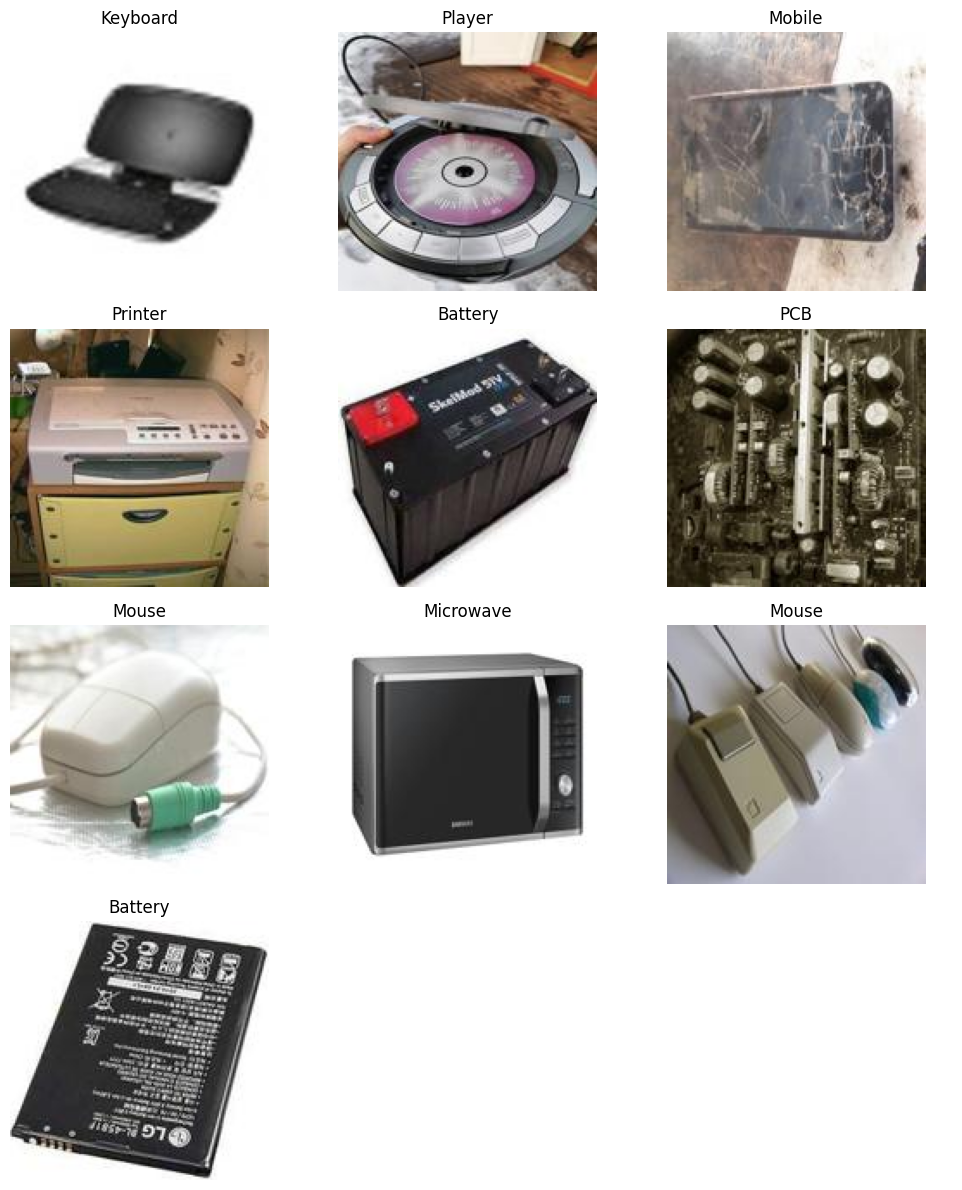

In [ ]:
import random
# Assuming train_paths and train_labels are available from the data splitting step
# Assuming images have been copied to the train_dir

# Define the number of sample images to display
num_samples = 10

# Select random indices from the training data
sample_indices = random.sample(range(len(test_paths)), num_samples)

# Create a figure and a set of subplots (changed to 4x3 to accommodate 10 images)
fig, axes = plt.subplots(4, 3, figsize=(10, 12)) # Adjusted figsize for better layout
axes = axes.ravel() # Flatten the 2D array of axes for easy iteration

# Display the sample images
for i, idx in enumerate(sample_indices):
    img_path = test_paths[idx]
    label = test_labels[idx]

    try:
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off') # Hide the axes
    except Exception as e:
        print(f"Could not open image {img_path}: {e}")
        axes[i].set_title("Error loading image")
        axes[i].axis('off')

# Hide any unused subplots if num_samples is less than the total number of subplots
for j in range(num_samples, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

#Sample Validation Data

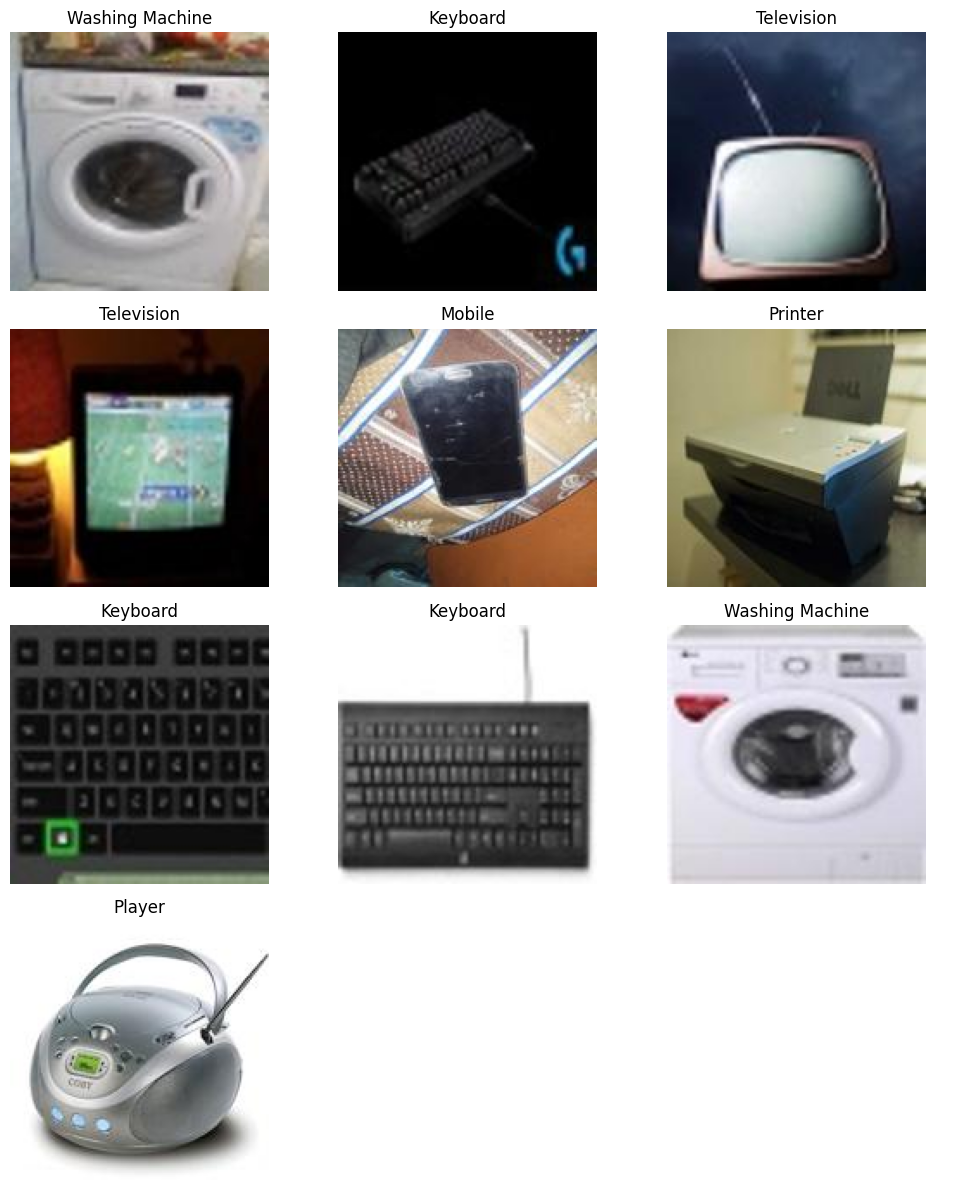

In [ ]:
# Define the number of sample images to display
num_samples = 10

# Select random indices from the validation data
sample_indices = random.sample(range(len(val_paths)), num_samples)

# Create a figure and a set of subplots (adjust grid size based on num_samples)
# For 10 samples, a 4x3 grid works well
fig, axes = plt.subplots(4, 3, figsize=(10, 12))
axes = axes.ravel() # Flatten the 2D array of axes for easy iteration

# Display the sample images
for i, idx in enumerate(sample_indices):
    img_path = val_paths[idx]
    label = val_labels[idx]

    try:
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off') # Hide the axes
    except Exception as e:
        print(f"Could not open image {img_path}: {e}")
        axes[i].set_title("Error loading image")
        axes[i].axis('off')

# Hide any unused subplots if num_samples is less than the total number of subplots
for j in range(num_samples, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Resizing Images

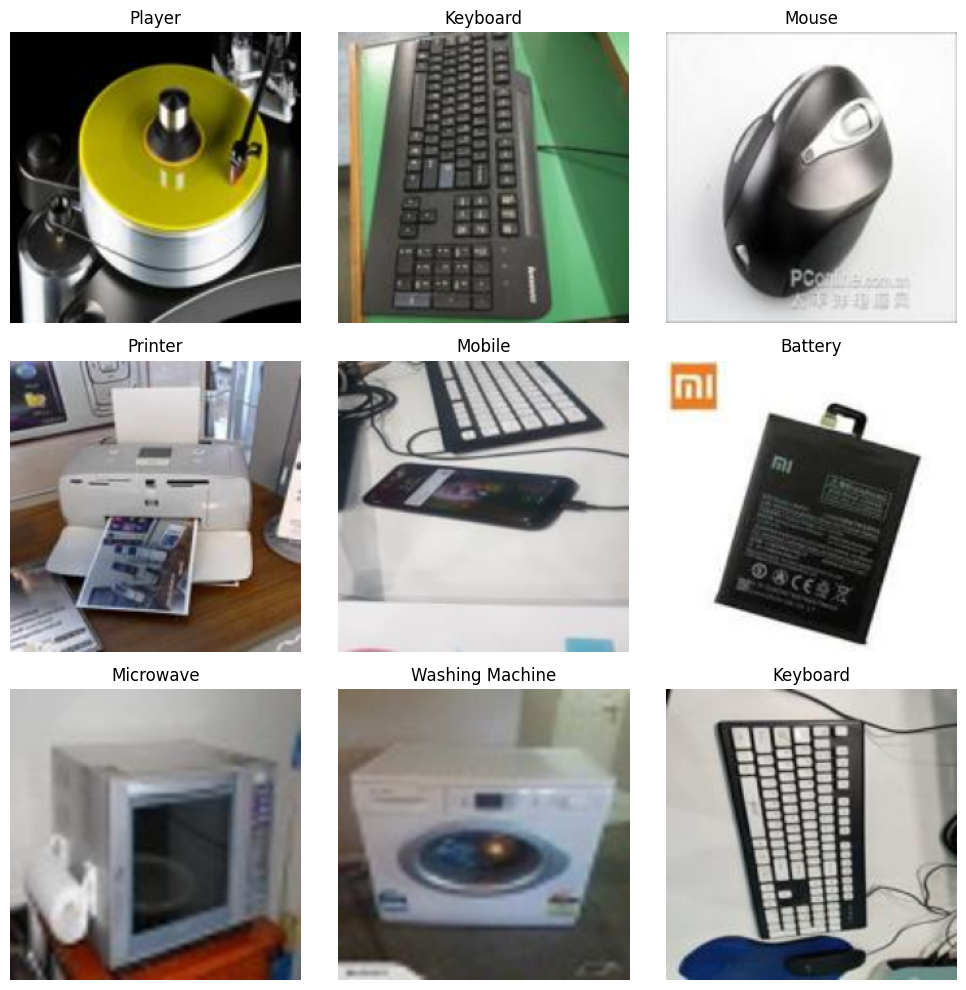

In [ ]:

import numpy as np # Import numpy

# Define the desired image size
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Create a Keras preprocessing layer for resizing
resize_layer = tf.keras.layers.Resizing(IMG_HEIGHT, IMG_WIDTH)

# Assuming train_paths and train_labels are available from the data splitting step

# Define the number of sample images to display
num_samples = 9 # Display 9 images in a 3x3 grid

# Select random indices from the training data
sample_indices = random.sample(range(len(train_paths)), num_samples)

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel() # Flatten the 2D array of axes for easy iteration

# Display the sample images
for i, idx in enumerate(sample_indices):
    img_path = train_paths[idx]
    label = train_labels[idx]

    try:
        # Load image using PIL
        img = Image.open(img_path)
        img = img.convert("RGB") # Ensure image is in RGB format

        # Convert PIL image to TensorFlow tensor
        img_tensor = tf.convert_to_tensor(np.array(img))
        img_tensor = tf.expand_dims(img_tensor, axis=0) # Add batch dimension

        # Apply resizing using the Keras layer
        resized_img_tensor = resize_layer(img_tensor)

        # Remove batch dimension and convert back to numpy for display
        resized_img_np = resized_img_tensor.numpy().squeeze().astype("uint8")

        axes[i].imshow(resized_img_np)
        axes[i].set_title(label)
        axes[i].axis('off') # Hide the axes
    except Exception as e:
        print(f"Could not process image {img_path}: {e}")
        axes[i].set_title("Error processing image")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

#splitting dataset as train, test and val

In [ ]:
import tensorflow as tf

# Assuming train_paths, train_labels, val_paths, val_labels, test_paths, and test_labels
# are available from the data splitting step (e.g., from cell 'e4d86b74')

# Create TensorFlow Datasets from the image paths and labels
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

print("TensorFlow Datasets for train, validation, and test created.")

TensorFlow Datasets for train, validation, and test created.


#Applying Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

#Loading the CNN Model EfficientNetV2B0

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    # Removed data_augmentation layer from here
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [ ]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [74]:
# Define the desired image size based on the model's input shape
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Create a mapping from class names (strings) to integer indices
unique_classes = sorted(list(set(train_labels))) # Get unique class names and sort them
class_to_index = {class_name: i for i, class_name in enumerate(unique_classes)}



In [75]:
# Function to load, decode, resize, and convert labels to integers
def load_and_preprocess_image(image_path, label):
    # Load the image file
    img = tf.io.read_file(image_path)
    # Decode the image (assuming JPEG format, adjust if needed)
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # Normalize pixel values to the range [0, 1]
    img = img / 255.0
    # Convert string label to integer index
    label_index = tf.py_function(lambda l: class_to_index[l.numpy().decode('utf-8')], [label], tf.int64)
    label_index.set_shape([]) # Set the shape of the scalar tensor
    return img, label_index

# Apply the loading and preprocessing function to the datasets
processed_train_ds = train_ds.map(load_and_preprocess_image)
processed_val_ds = val_ds.map(load_and_preprocess_image)


In [76]:
def apply_augmentation(image, label):
    # Add a batch dimension before applying augmentation
    image = tf.expand_dims(image, axis=0)

    # Apply the augmentation layers
    # Setting training=True ensures the random transformations are applied
    augmented_image = data_augmentation(image, training=True)
    # Remove the batch dimension
    augmented_image = tf.squeeze(augmented_image, axis=0)
    return augmented_image, label

augmented_and_processed_train_ds = processed_train_ds.map(apply_augmentation)




#Fitting the Model

In [77]:
# Define batch size and prefetch buffer size
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
epochs=5

# Batch and prefetch the datasets for efficient training
# Use the augmented training dataset
final_train_ds = augmented_and_processed_train_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
final_val_ds = processed_val_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)


history = model.fit(
    final_train_ds, # Use the final processed and augmented training dataset
    validation_data=final_val_ds, # Use the final processed validation dataset
    epochs=epochs,
    callbacks=[early]
)

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - Accuracy: 0.2434 - loss: 2.0269 - val_Accuracy: 0.3200 - val_loss: 1.9240
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - Accuracy: 0.2783 - loss: 1.9969 - val_Accuracy: 0.3667 - val_loss: 1.8376
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - Accuracy: 0.2982 - loss: 1.9457 - val_Accuracy: 0.2889 - val_loss: 1.9508
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - Accuracy: 0.2809 - loss: 1.9850 - val_Accuracy: 0.4200 - val_loss: 1.7117
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - Accuracy: 0.3108 - loss: 1.9009 - val_Accuracy: 0.4356 - val_loss: 1.6950


In [78]:
model.summary() # Print the architecture summary of the  model


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [79]:
base_model.summary() # Print the architecture summary of the base model


Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

In [80]:
### Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           # Training accuracy
val_acc = history.history['val_Accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

#Plot For Training VS Validation Accuracy and loss

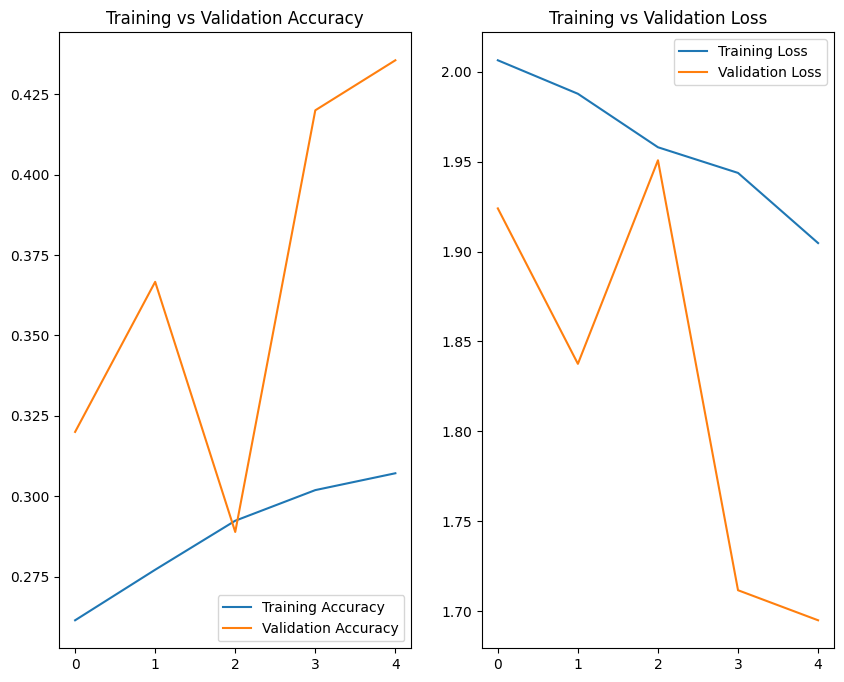

In [81]:
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 # Set overall figure size

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Show legend at lower right
plt.title('Training vs Validation Accuracy') # Set title for accuracy plot

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # Plot validation loss
plt.legend(loc='upper right')              # Show legend at upper right
plt.title('Training vs Validation Loss')    # Set title for loss plot

plt.show()                                  # Display the plots

In [ ]:
# Process the test dataset
processed_test_ds = test_ds.map(load_and_preprocess_image)

# Batch and prefetch the processed test dataset
final_test_ds = processed_test_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)


# Evaluate the model on the processed and batched test dataset
loss, accuracy = model.evaluate(final_test_ds)

print(f'Test accuracy is {accuracy:.4f}, Test loss is {loss:.4f}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - Accuracy: 0.2796 - loss: 2.0317
Test accuracy is 0.3178, Test loss is 1.9671


#Classification Report and Confusion Matrix

In [ ]:
### Evaluate Model Performance on Test Data using Confusion Matrix and Classification Report

# Extract true labels from all batches
y_true = np.concatenate([y.numpy() for x, y in final_test_ds], axis=0)  # Ground truth labels

# Get predictions as probabilities and then predicted classes
y_pred_probs = model.predict(final_test_ds)

# Class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 650ms/step
[[22  0  0  1  2  4  8  7  0  1]
 [ 8 17  1  1  7  2  4  5  0  0]
 [ 6  6  5  7  3  2  6  5  4  1]
 [ 5 12  0  7 11  0  2  5  1  2]
 [ 3  3  0  0 22  0 11  4  1  1]
 [ 4  6  0  0  5 12 10  8  0  0]
 [ 5  2  0  0  3  1 25  7  1  1]
 [ 4  0  0  1  8  1 15 15  1  0]
 [ 2  5  0  5  8  4  6  6  9  0]
 [ 9  1  2  0 11  2  7  4  0  9]]
              precision    recall  f1-score   support

           0       0.32      0.49      0.39        45
           1       0.33      0.38      0.35        45
           2       0.62      0.11      0.19        45
           3       0.32      0.16      0.21        45
           4       0.28      0.49      0.35        45
           5       0.43      0.27      0.33        45
           6       0.27      0.56      0.36        45
           7       0.23      0.33      0.27        45
           8       0.53      0.20      0.29        45
           9       0.60      0.20      0.30        45

    accuracy                   

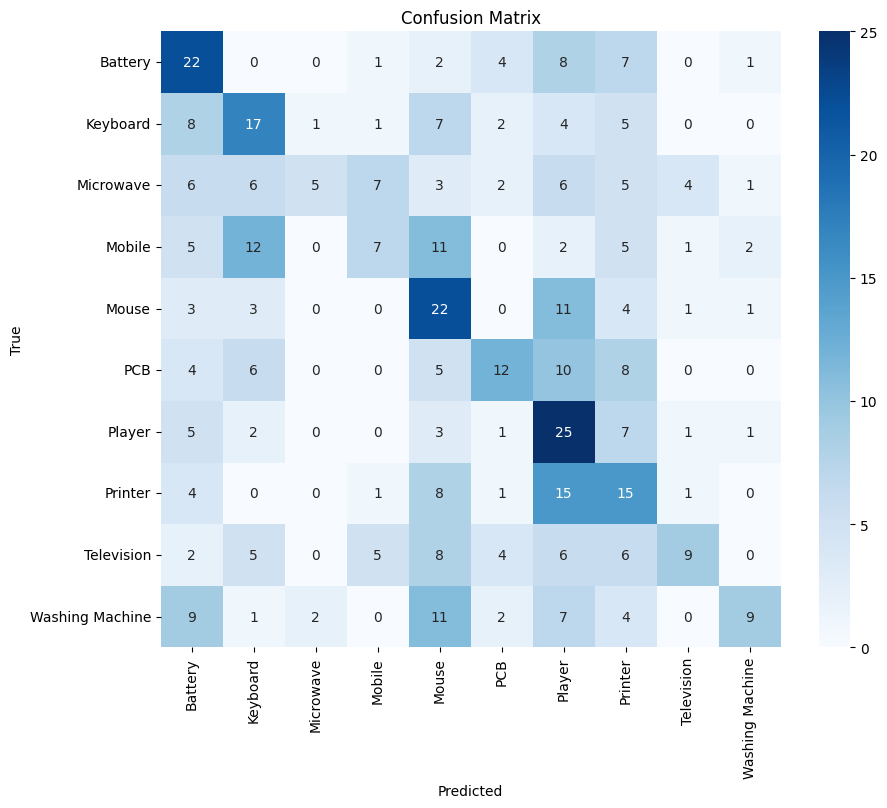

In [ ]:
### Plot Confusion Matrix as Heatmap for Better Visualization

cm = confusion_matrix(y_true, y_pred)                                     # Compute confusion matrix
                                                     # Import seaborn for visualization

plt.figure(figsize=(10, 8))                                               # Set figure size
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=unique_classes,  # Use unique_classes for x-axis labels
            yticklabels=unique_classes,  # Use unique_classes for y-axis labels
            cmap='Blues')                                                 # Create heatmap with class labels

plt.xlabel('Predicted')                                                   # Label for x-axis
plt.ylabel('True')                                                        # Label for y-axis
plt.title('Confusion Matrix')                                             # Title for the plot
plt.show()

..





.







.







.



























.

































.






















































.







































.



























.






.
.










.












.























































.
















.

























.































.